In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras
from sklearn.preprocessing import MinMaxScaler


In [149]:
file_path = 'https://docs.google.com/spreadsheets/d/1V6cBNRohsvWOEcPUMWyZ6tMAvc25Ji2U/export?format=csv'
data = pd.read_csv(file_path)


In [150]:

# Ensure all values are numeric (convert non-numeric values to NaN)
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)
# Remove rows where all values are zero
data = data.loc[~(data.eq(0).all(axis=1))]

data['resi_value'] = data.apply(lambda row : row['resi_value'] if row['trend_type']==-1 else 100-row['resi_value'], axis = 1)

data.tail(30)



,time,max_seen,min_seen,trend_type,price,leg_3_to_1,leg_2_to_1,leg_2_correction,resistance_filter,rsi_filter,resi_value,max_move
19602,0.0,1.08191,1.08088,1,1.08173,1.37,0.33,71,0,0,25.40,18
19603,0.0,1.08191,1.08108,-1,1.08111,0.60,0.63,38,1,1,32.46,3
19604,0.0,1.08145,1.08109,-1,1.08111,0.46,0.44,87,1,0,27.67,2
19605,0.0,1.08204,1.08056,-1,1.08118,0.85,0.58,86,1,0,26.32,62
19606,0.0,1.08263,1.08052,1,1.08167,4.13,0.96,63,1,1,33.13,96
19607,0.0,1.08263,1.07688,-1,1.07975,0.80,0.18,24,0,1,38.69,287
19608,0.0,1.08590,1.08099,1,1.08175,0.40,0.06,36,0,1,31.41,415
19609,0.0,1.08590,1.08114,1,1.08163,1.25,0.47,41,0,1,37.68,427
19610,0.0,1.08263,1.08130,-1,1.08181,1.64,0.43,96,0,1,35.31,51
19611,0.0,1.08259,1.08130,-1,1.08172,0.94,0.22,23,0,1,34.15,42


In [151]:
# # replace all negative values in max_price_move with 0 because out stoploss has been hitted anyway
# data["max_price_move"] = data["max_price_move"].apply(lambda x: max(0, x))
# data

In [152]:
reserve = data
data = data.drop(['time','price','trend_type','max_seen', 'min_seen'], axis=1)
# data = data.drop(['rsi_filter','resistance_filter'], axis=1)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19632 entries, 0 to 19631
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   leg_3_to_1         19632 non-null  float64
 1   leg_2_to_1         19632 non-null  float64
 2   leg_2_correction   19632 non-null  int64  
 3   resistance_filter  19632 non-null  int64  
 4   rsi_filter         19632 non-null  int64  
 5   resi_value         19632 non-null  float64
 6   max_move           19632 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.2 MB


In [154]:
data.describe()

,leg_3_to_1,leg_2_to_1,leg_2_correction,resistance_filter,rsi_filter,resi_value,max_move
count,19632.000000,19632.000000,19632.000000,19632.000000,19632.000000,19632.000000,19632.00000
mean,1.653643,0.871775,60.405410,0.313162,0.606764,31.333625,657.90378
std,3.023404,2.029656,21.848241,0.463792,0.488481,6.301682,1735.23416
min,0.010000,0.010000,7.000000,0.000000,0.000000,4.420000,-103.00000
25%,0.530000,0.270000,43.000000,0.000000,0.000000,27.380000,47.00000
50%,1.030000,0.510000,60.000000,0.000000,1.000000,31.770000,150.00000
75%,1.920000,0.950000,78.000000,1.000000,1.000000,35.800000,506.00000
max,162.000000,92.000000,100.000000,1.000000,1.000000,65.740000,21468.00000


In [155]:
data.shape

(19632, 7)

In [156]:
data.isnull().sum()

leg_3_to_1           0
leg_2_to_1           0
leg_2_correction     0
resistance_filter    0
rsi_filter           0
resi_value           0
max_move             0
dtype: int64

In [157]:
# normalized_df = keras.utils.normalize(data)
# type(normalized_df)
# data = pd.DataFrame(normalized_df, columns=["leg_3_to_leg_1_time","leg_2_to_leg_1_time","leg_2_correction_percent","resistance","rsi_filter_passed","normalized_rsi","max_price_move"])
# data

In [158]:
#normalize data
columns_to_normalize = data.columns.difference(['rsi_filter','max_move'])
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

print(data)



       leg_3_to_1  leg_2_to_1  leg_2_correction  resistance_filter  \
0        0.013643    0.032504          0.892473                0.0   
1        0.037286    0.014023          0.602151                0.0   
2        0.002716    0.000761          0.236559                0.0   
3        0.009877    0.005327          0.559140                0.0   
4        0.007778    0.004457          0.655914                0.0   
...           ...         ...               ...                ...   
19627    0.008087    0.004131          0.903226                0.0   
19628    0.005062    0.001848          0.290323                0.0   
19629    0.056732    0.029242          0.956989                0.0   
19630    0.007655    0.007392          0.505376                0.0   
19631    0.005371    0.005327          0.440860                0.0   

       rsi_filter  resi_value  max_move  
0               1    0.497717       270  
1               0    0.374592       230  
2               0    0.342955    

In [159]:

# Separate features and target variable
X = data.drop('max_move', axis=1)
y = data['max_move']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a StandardScaler for scaling the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(256, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='relu'),
    Dense(32, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(1)  # Output layer for regression
])

# Compile the model with mean squared error loss for regression
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test MAE: {test_mae}")

# Predict on new data (example)
predictions = model.predict(X_test_scaled)


Epoch 1/50


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2841937.0000 - mae: 754.6342 - val_loss: 3441447.5000 - val_mae: 800.8883
Epoch 2/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2845408.7500 - mae: 779.3696 - val_loss: 3449465.0000 - val_mae: 777.9880
Epoch 3/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3148336.2500 - mae: 804.1005 - val_loss: 3473456.0000 - val_mae: 738.0277
Epoch 4/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2995030.0000 - mae: 783.7675 - val_loss: 3437682.0000 - val_mae: 818.4594
Epoch 5/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3029189.5000 - mae: 788.5952 - val_loss: 3530157.7500 - val_mae: 686.1797
Epoch 6/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3026939.7500 - mae: 779.1202 - val_loss: 3437317.5000 - val_mae: 820.8513
Epoch 7/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2577397.7500 - mae: 740.6914 - val_loss: 3435750.2500 - val_mae: 836.7516
Epoch 8/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3074595.5000 

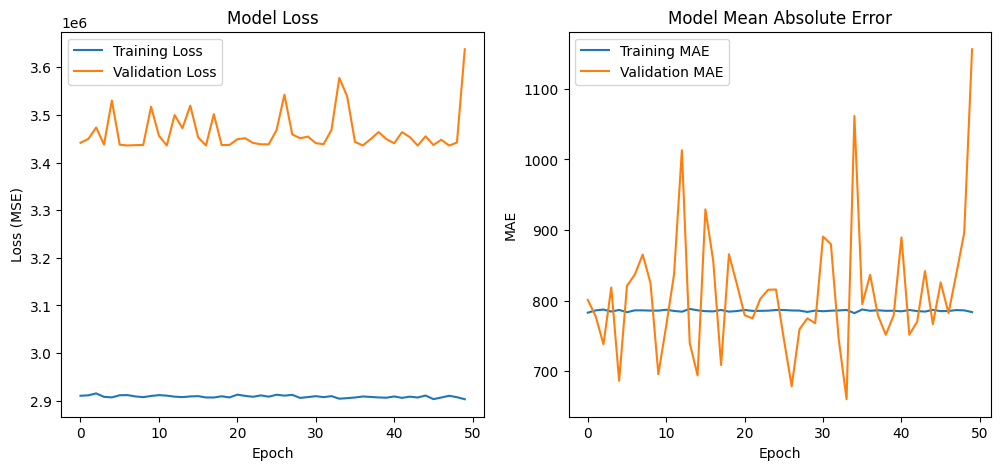

In [160]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# Mean Absolute Error
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()


In [161]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")


123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 3374083.5000 - mae: 1137.9384
Test Loss (MSE): 3257842.0
Test Mean Absolute Error (MAE): 1121.686767578125


In [162]:
import numpy as np

# Make predictions
predictions = model.predict(X_test_scaled).flatten()

# Compare predictions with actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(comparison_df.head(10))  # Display first 10 rows for a quick check


  1/123 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
       Actual    Predicted
15545    2486  1132.976440
4740       93  1132.976196
2221        0  1132.976440
10522      30  1132.976318
9098       35  1132.976440
12459     904  1132.976440
5351      521  1132.976318
18855     541  1132.976196
12618      59  1132.976196
3974      103  1132.976318
